## **Analysing Infrastructures in Singapore**

Name : Wong Thai Siang

Title : Discovering the Factors Affecting Resale Prices of HDB flats in Singapore.

        
<hr>

In [46]:
import numpy as np
import matplotlib.pyplot as plt

## Analysis 1

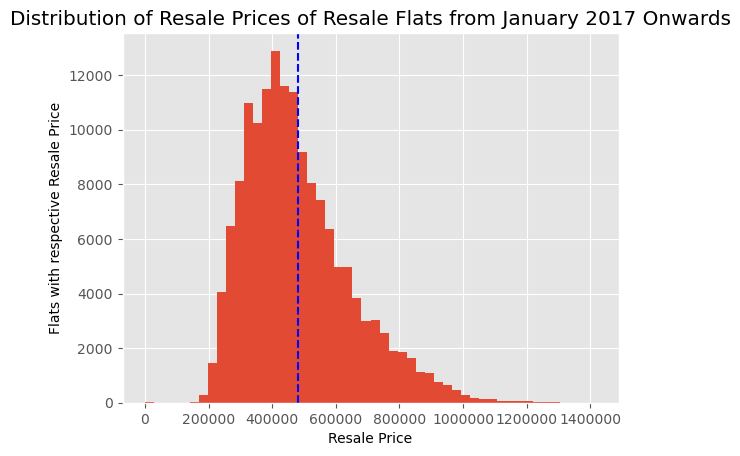

In [47]:



data = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)
price = data[:]["resale_price"]

plt.title('Distribution of Resale Prices of Resale Flats from January 2017 Onwards')
plt.ylabel('Flats with respective Resale Price')
plt.xlabel("Resale Price")
plt.style.use("ggplot")
plt.hist(price, bins =50)
plt.ticklabel_format(style='plain', axis='x')                                                                                                           
avg_price = price.mean()
plt.axvline(avg_price, color='b', linestyle='--', label="Mean")

plt.show()

## Analysis 2
<h3>"How much has each flat type's resale price increased since 1990?  "</h3>
<br>





/tmp/ipykernel_3798/4002650769.py:45: RuntimeWarning: Mean of empty slice.
  avg_price = resale_price.mean()
/home/kellories/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


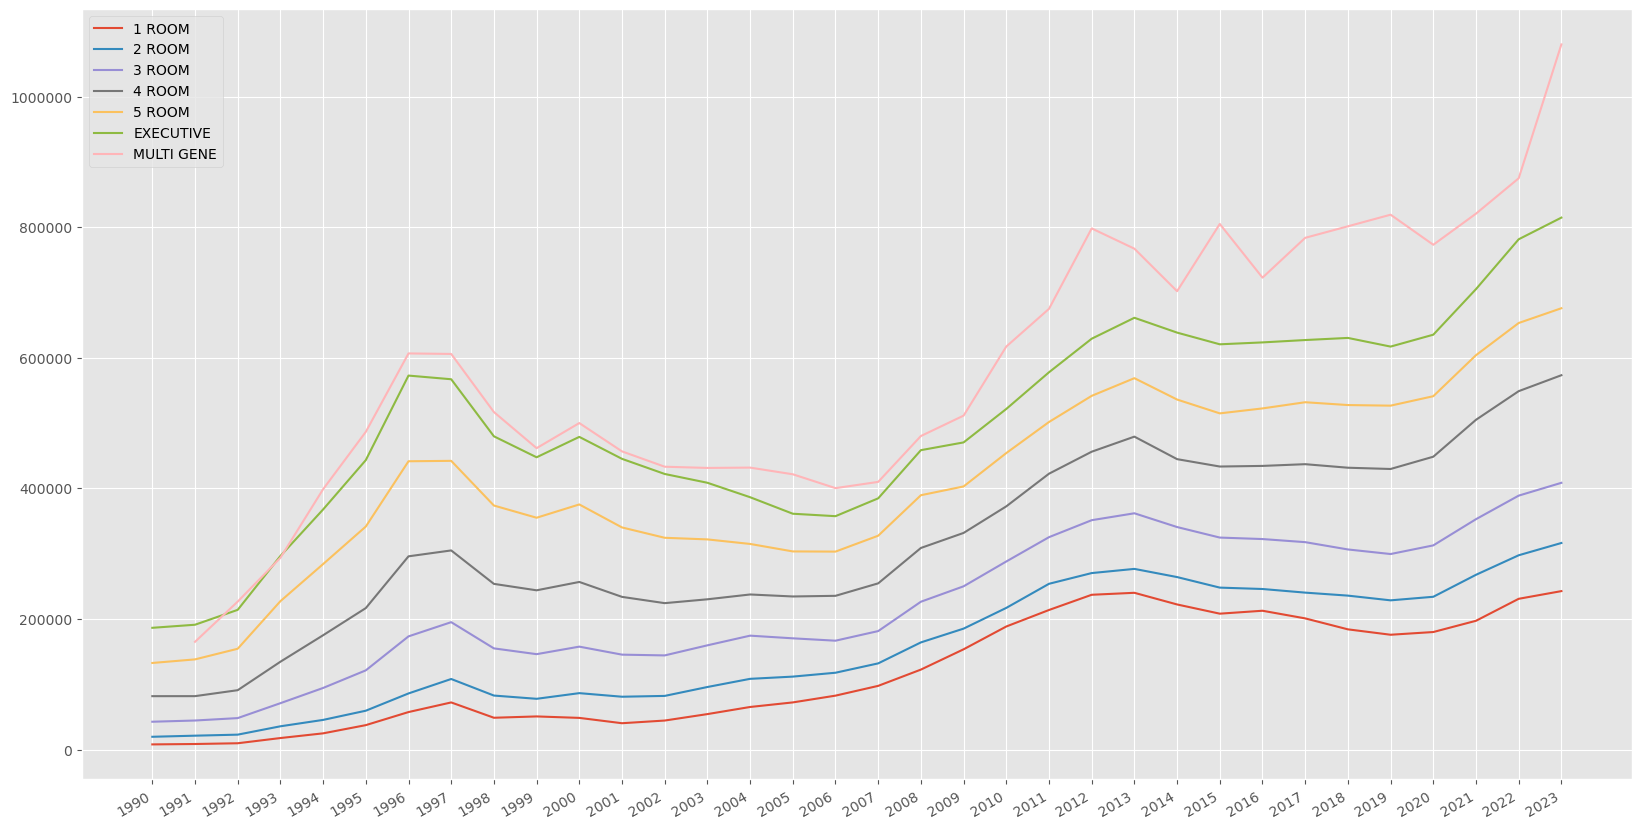

In [48]:
# Merging resale prices from 1990
data1990_1999 = np.genfromtxt('./datasets/resale-flat-prices-based-on-approval-date-1990-1999.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8', 'i8'], delimiter = ",", names = True)
data2000_2012 = np.genfromtxt('./datasets/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'i8'], delimiter = ",", names=True)
data2012_2014 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',   'i8'],
                                delimiter=",",names=True)
data2014_2016 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                usecols=(0,1,2,3,4,5,6,7,8,10),delimiter=",",names=True)
data2017_onwards = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
                                  dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                   usecols=(0,1,2,3,4,5,6,7,8,10), delimiter=",",names=True)

combined_data = np.concatenate((data1990_1999, data2000_2012, data2012_2014, data2014_2016, data2017_onwards))

for i in range(len(combined_data)):
    # change month to year
    combined_data[i]['month'] = combined_data[i]["month"][:4]
    # fixing inconsistent naming for multi gene
    if combined_data[i]['flat_type'] == 'MULTI-GENE':
        combined_data[i]['flat_type'] = "MULTI GENE"
     

years = np.unique(combined_data['month'])
flats = np.unique(combined_data['flat_type'])


rooms =  {
     '1 ROOM': [],
     '2 ROOM': [],
     '3 ROOM': [],
     '4 ROOM': [],
     '5 ROOM': [],
     'EXECUTIVE' :[],
     'MULTI GENE': [],
     'years': years
}
   
for i in years:
    for n in flats:
        # append mean price to rooms
        resale_price = combined_data[(combined_data['flat_type'] == n) & (combined_data['month'] == i)]['resale_price']
        avg_price = resale_price.mean()
        rooms[n].append([avg_price]) 

fig,ax = plt.subplots(1,figsize=(20,10))



plt.plot('years','1 ROOM',data=rooms, )
plt.plot('years','2 ROOM',data=rooms, )
plt.plot('years','3 ROOM',data=rooms,)
plt.plot('years','4 ROOM',data=rooms, )
plt.plot('years','5 ROOM',data=rooms, )
plt.plot('years','EXECUTIVE',data=rooms, )
plt.plot('years','MULTI GENE',data=rooms, )
plt.ticklabel_format(style='plain', axis='y')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


plt.legend()
plt.show()



From my line graph, I observe there are 2 instances where the price of Multi Gene Flat intersects with Executive, once in between 1992 and 1993 and another instance in 1994.
It is unusual as Multi Gene flats offers lesser floor area than Executive flats, hence given the price point, more Singaporeans would have bought Executive flats at the listed times. 



<h2>Analysis 3</h2>


 I will be finding the relationship between the storey range and price of resale flats. I will be using the dataset of HDB resale prices from 2017 onwards. This will be illustrated through a series of bar graphs.

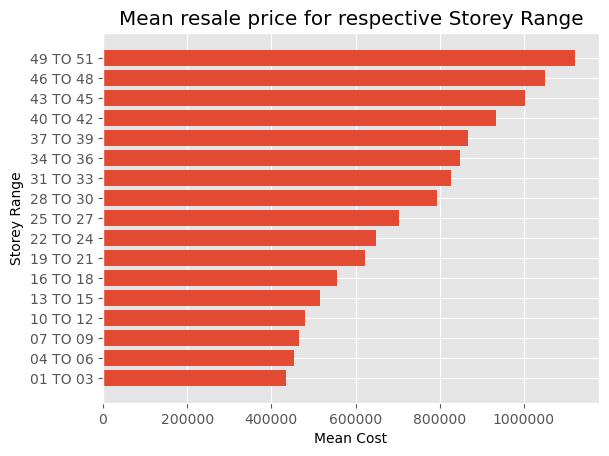

In [49]:


data = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)

listOfStoreys = np.unique(data[:]["storey_range"])
listOfMean = []
for i in listOfStoreys:
    indicies = np.where(data[:]["storey_range"] == i)
    tem_sum = data[indicies]["resale_price"].mean()
    listOfMean.append(tem_sum)

fig, ax = plt.subplots()
plt.style.use("ggplot")
plt.title("Mean resale price for respective Storey Range")
plt.ylabel("Storey Range")
plt.xlabel("Mean Cost")
plt.ticklabel_format(style='plain', axis='x')
ax.barh(listOfStoreys,listOfMean)
plt.show()

From the above bar graph, we can conclude that the higher the storey range, the higher the resale price. This tells me that there is a demand for high-rise HDB buildings and Resale Flats in Singapore.

<h2>Analysis 4</h2>

The question for this analysis is: "What is the most popular HDB type among resale flats?"

I will be using the dataset I have found on data.gov.sg, "Number of Resale Applications Registered by Flat Type, by Quarter".

My hypothesis is that the Number of Resale Applications will increase as the Number of Rooms in the Flat Type increases.

Through my data representation, I will find a conclusion to this question.

/tmp/ipykernel_3798/4230989486.py:40: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fig,labels=labels,loc='center left', bbox_to_anchor = (-0.1,1.))


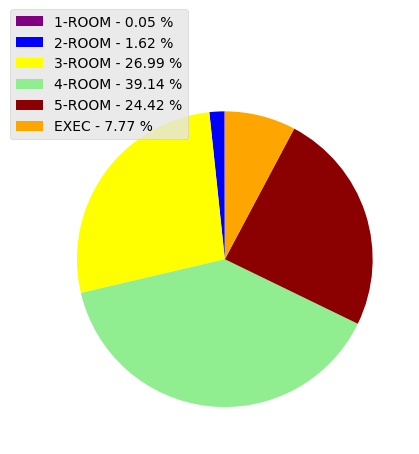

In [50]:


data = np.genfromtxt('./datasets/number-of-resale-applications-registered-by-flat-type.csv', dtype=['U8','U8','i8'],delimiter= ',',names=True)

for i in range(len(data)):
    if data["flat_type"][i] == "1-room":
        data["flat_type"][i] = '1-ROOM'
    elif data["flat_type"][i] == '2-room':
        data["flat_type"][i] = '2-ROOM'
    elif data['flat_type'][i] == '3-room':
        data["flat_type"][i] = '3-ROOM'
    elif data['flat_type'][i] == '4-room':
        data["flat_type"][i] = '4-ROOM'
    elif data['flat_type'][i] == '5-room':
        data['flat_type'][i] = '5-ROOM'
    elif data['flat_type'][i] == 'Executiv':
        data['flat_type'][i] = "EXEC"


unique_years = np.unique([row[0][:4] for row in data])
data_2020_onwards = []
for i in data:
    year_quarter = i[0]  # Assuming the "year-quarter" column is at index 0 in each tuple
    
    if year_quarter[:4] >= '2017':
        data_2020_onwards.append(i)


flat = np.unique([data[1] for data in data_2020_onwards])
numbers = []
for i in flat:
    indicies = np.where(data['flat_type'] == i)
    numbers.append(data[indicies]['no_of_resale_applications'].sum())
total = sum(numbers)
# Changes sums into percentages
for i in range(len(numbers)):
    numbers[i] = (numbers[i]/total)*100

colors = ["purple","blue","yellow","lightgreen","darkred","orange"]
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(flat,numbers)]
fig = plt.pie(numbers,startangle=90,colors=colors)
plt.legend(fig,labels=labels,loc='center left', bbox_to_anchor = (-0.1,1.))
plt.show()



<h2>Analysis 5 </h2>
<h3>Does floor area affect resale price?</h3>
My Hypothesis: "The greater the amount of floor area, the greater the Resale Price of the flat is"

For this analysis, I will be using data from the past 10 years. 
As in Analysis 2, I concluded that the most recent time where there was not much change in the price of each flat type was from 2012 onwards, I will be using data from 2012 onwards to prove my hypothesis. <br>This helps to reduce other factors that may affect the resale price, as all flat types saw the same trend. Thus allowing me to get a fairer conclusion to the question at hand.

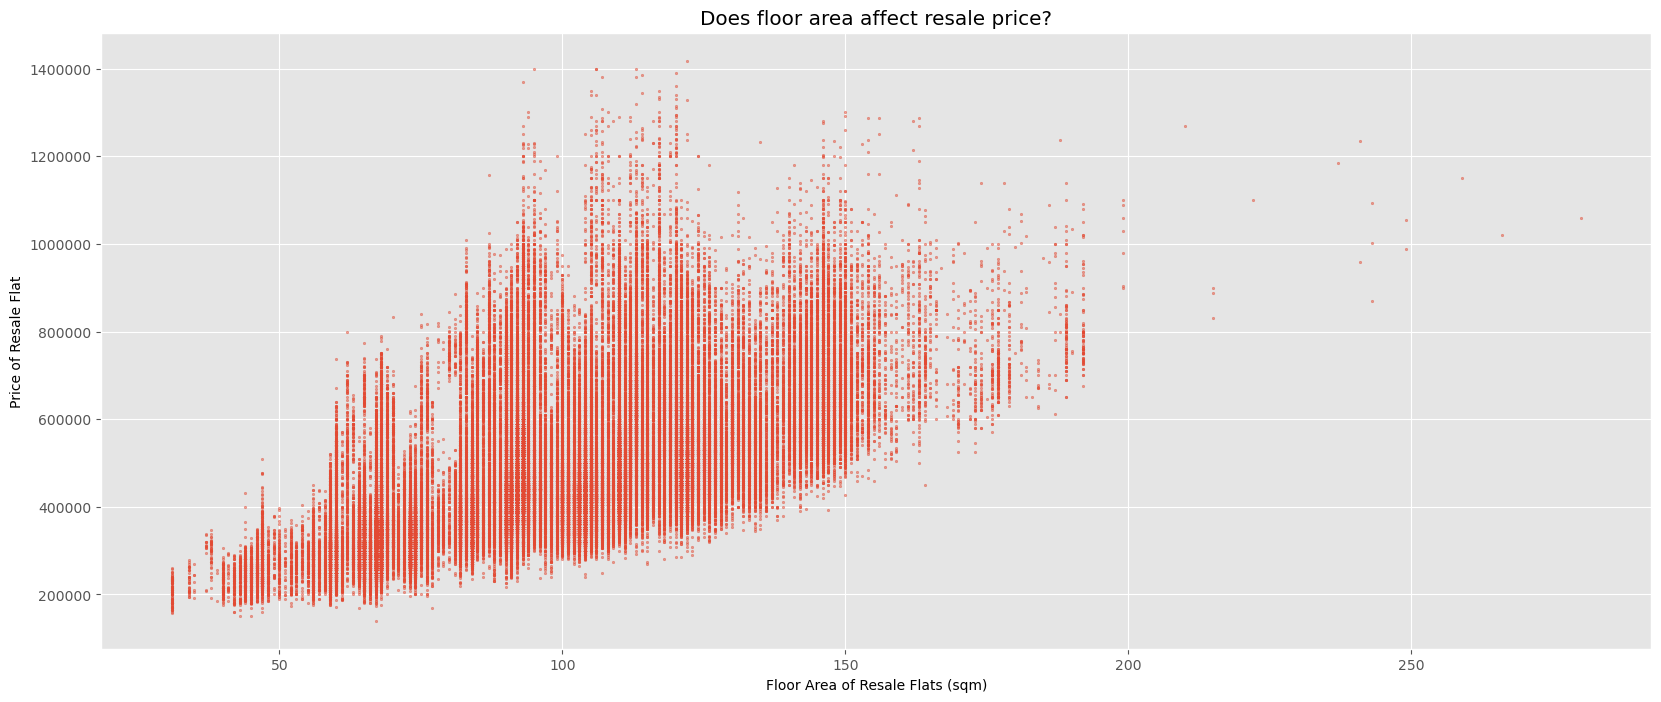

In [54]:
data2012_2014 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',   'i8'],
                                delimiter=",",names=True)
data2014_2016 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                usecols=(0,1,2,3,4,5,6,7,8,10),delimiter=",",names=True)
data2017_onwards = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
                                  dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                   usecols=(0,1,2,3,4,5,6,7,8,10), delimiter=",",names=True)
#combine all data into one np arr
combined_data = np.concatenate([data2012_2014,data2014_2016,data2017_onwards])

floor_area = []
price = []
for i in range(len(combined_data)):
    #converts month into year
    combined_data['month'][i] = combined_data['month'][i][:4]
    if combined_data['resale_price'][i] > 0:
        floor_area.append(combined_data['floor_area_sqm'][i])
        price.append(combined_data['resale_price'][i])

fig, ax = plt.subplots(1, figsize = (20,8))
plt.scatter(x = floor_area, y = price, s = 3, alpha = 0.5)
plt.title("Does floor area affect resale price?")
plt.xlabel("Floor Area of Resale Flats (sqm)")
plt.ylabel("Price of Resale Flat")
plt.ticklabel_format(style='plain', axis='y')

## **References**
<hr>
URLS:<br> 
https://data.gov.sg/dataset/resale-flat-prices<br>
https://data.gov.sg/dataset/median-rent-by-town-and-flat-type 